# PyTorch Workflow

Let's explore an examlpe PyTorch end-to-end workflow.

Resources:
* Ground truth notebook: https://github.com/mrdbourke/pytorch-deep-learning/blog/main/01_pytorch_workflow.ipynb
* Book version of notebook: https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question: https://github.com/mrbdourke/pytorch-deep-learning/discussions

In [124]:
what_were_covering = {1: "data (prepare and load",
                      2: "build model",
                      3: "fitting the model to data (training",
                      4: "making predictions and evaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load',
 2: 'build model',
 3: 'fitting the model to data (training',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [142]:
import torch
from torch import nn # nn contains all PyTorch's building blocks for neural networks
import numpy as np
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.12.1'

## 1 Data, preparing and loading

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio (like songs or podcasts)
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *know* data using the linear regression formula (y = ax + b).

We'll use a linear regression formula to make a straight line with *known* **parameters**

In [126]:
# Create *know* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [127]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets, one of the most important concepts in machine learning in general

Let's create a training and test set with our data

In [128]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [129]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

    # Plots training data, test data and predictions
    
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    #Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size":14});

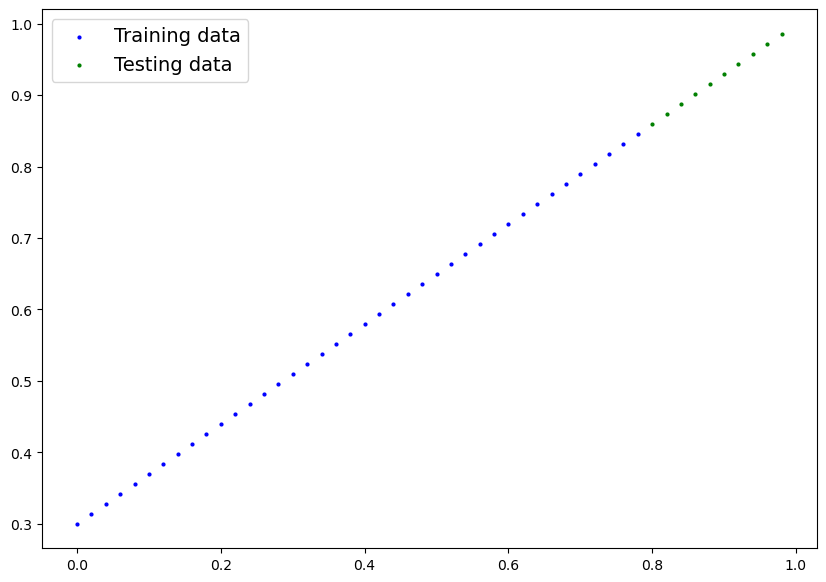

In [130]:
plot_predictions();

## 2. Building model


Our firsth PyTorch model!

This is very excisting... let's do it!

Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in Pythong, to do so you can use the following resource form Real Python: https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random values (weight & bias)
* Look at the training data and adjust the rantom values to better represent (or get closer to) the ideal values (the weigh & bias values we used the create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent: https://youtu.be/IHZwWFHWa-w
2. Backpropagation: https://youtu.be/IIg3gGewQ5U

In [131]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):                             # <- almost everything in PyTorch inherhits from nn.Module
    def __init__(self):
        super().__init__()

        # Initialize model parameters
        self.weights = nn.Parameter(torch.randn(1,                  # start with a random weight and try to adjust it to the ideal weight
                                                dtype=torch.float), # PyTorch loves the data type torch.float32
                                    requires_grad=True)             # can this parameter be updated via gradient descent?

        self.bias = nn.Parameter(torch.randn(1,                     # start with a random bias and try to adjust it to the ideal bias
                                             dtype=torch.float),    # PyTorch loves the data type torch.float32
                                    requires_grad=True)             # can this parameter be updated via gradient descent?

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:             # <- "x" is the input data
        return self.weights * x + self.bias                         # this is the linear regression formula

### Pytorch model buidling essentials

* torch.nn - contains all of the buildings for computational graphs(a neural netwerk can be considered a computational graph)
* torch.nn.parameter - waht prameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural netwrk modules, if you subclass it, you should overwirte forward()
* torch.optim - this is where the optimizers in Pytorhc live, the will help with gradient descent
* def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens 

See more of these essential modules via the Pytorch cheatsheet: https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our Pytorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using .parameters

In [132]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [133]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_model()`

To check this we can pass it the test data `X_test `to see how closely it predicts `y_test`.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.

Let's make some predictions.

In [134]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

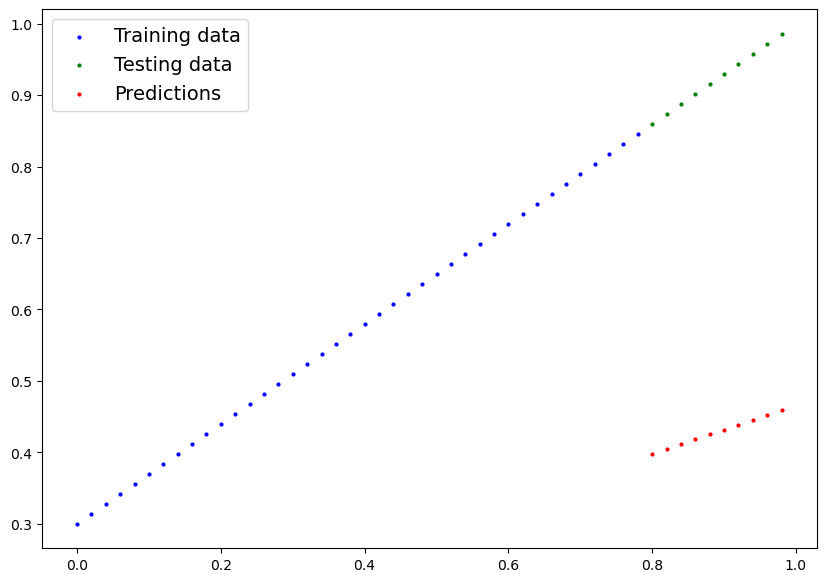

In [135]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are, is to use a loss function.

* Note: Loss function may also be called cost funtion or criterion in different areas. For our case, we're going to refer to it as a loss function.

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, so lower is better.

* **Optimizer:** Takes into account the loss of a models and adjusts the model's parameters (e.g. weight & bias) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [136]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [137]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [138]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # lr = learning rate = possibly the most important hyperparameter (a parameter you set yourself)

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for regrssion problem (like this), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem, like classifying wheter a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a trainig loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop throught the data
1. Forward pass (this involves data move throught our model's `forward()` functions) to make predctions on data - also called **forward propagation**
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network the calculate the gradients of ech of the parameters of our model with respect to the loss (**backpropagations** - https://www.youtube.com/watch?v=tIeHLnjs5U8)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent** - https://youtu.be/IHZwWFHWa-w)

### The Unofficial PyTorch Optimization Loop Song

https://youtu.be/Nutpusq_AFw

**Let’s train!**

*For an epoch in a range*\
*Call model dot train*\
*Do the forward pass*\
*Calculate the loss*\
*Optimizer zero grad*

*Lossssss backward*

*Optimizer step step step*

Let's test!

*Call model dot eval*\
*With torch inference mode,*\
*Do the forward pass*\
*Calculate the loss*\
*Print out what’s happenin’*

*Let’s do it again ‘gain ‘gain*

*For another epoch*\
*Call model dot train*\
*Do the forward pass*\
*Calculate the loss*\
*Optimizer zero grad*

*Lossssss backward*

*Optimizer step step step*

Let's test!

*Call model dot eval*\
*With torch inference mode,*\
*Do the forward pass*\
*Calculate the loss*\
*Print out what’s happenin’*

Keep going if you want

*But don’t forget to save save save*


In [139]:
torch.manual_seed(42)

# Track different values
epoch_count = [] 
loss_values = []
test_loss_values = [] 

# An epoch is one loop throught the data (which is a hyperparameter here)
epochs = 200

# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Caculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Performe backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will acculumate through the loop so, we have to zero them above in step 3 for the next iteration of the loop

    ## Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)

    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=aftDZicoiUGiklEP179x7A
    # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    
        # Do the forward pass 
        test_pred = model_0(X_test)
        # Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happenin'
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        # Print out model state_dict()
        print(model_0.state_dict(), "\n")
        

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))]) 

Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))]) 

Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))]) 

Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))]) 

Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))]) 

Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))]) 

Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', te

Predictions after 100 epochs


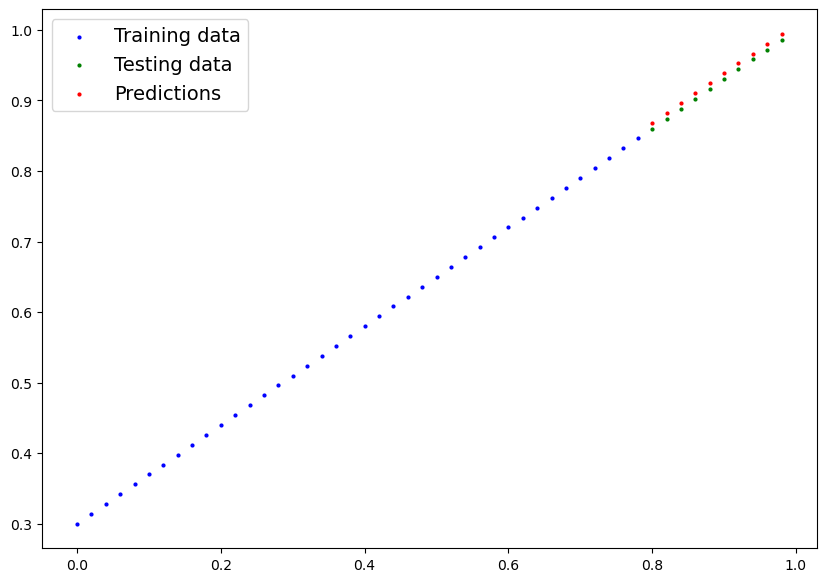

In [140]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)
print("Predictions after 100 epochs")

In [143]:
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

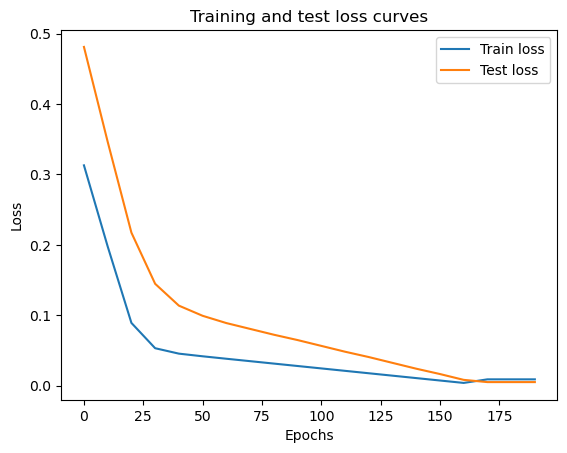

In [144]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Saving a model in PyTorch

There are three main methods you should know aobut for saving and loading in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

PyTorch save & load code tutorial + extra-curriculum - https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

In [147]:
# Saving our PyToch model
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [148]:
!ls -l models

total 8
-rw-r--r--  1 Vera  staff  1063 Jan  5 18:18 01_pytorch_workflow_model_0.pth


## Loading a model in PyTorch

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved state_dict() into that.

In [149]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [150]:
# To load in a staved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [151]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [152]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_preds = loaded_model_0(X_test)

loaded_model_0_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [156]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [157]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6 Puting it all toghether

Let's go back through the steps above and see it all in one place.

In [159]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.12.1'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [160]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [163]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size":14})

### 6.1 Data

In [194]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.4
bias = 0.5

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.5000],
         [0.5080],
         [0.5160],
         [0.5240],
         [0.5320],
         [0.5400],
         [0.5480],
         [0.5560],
         [0.5640],
         [0.5720]]))

In [195]:
# Split data (80% for training, 20% for testing)
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

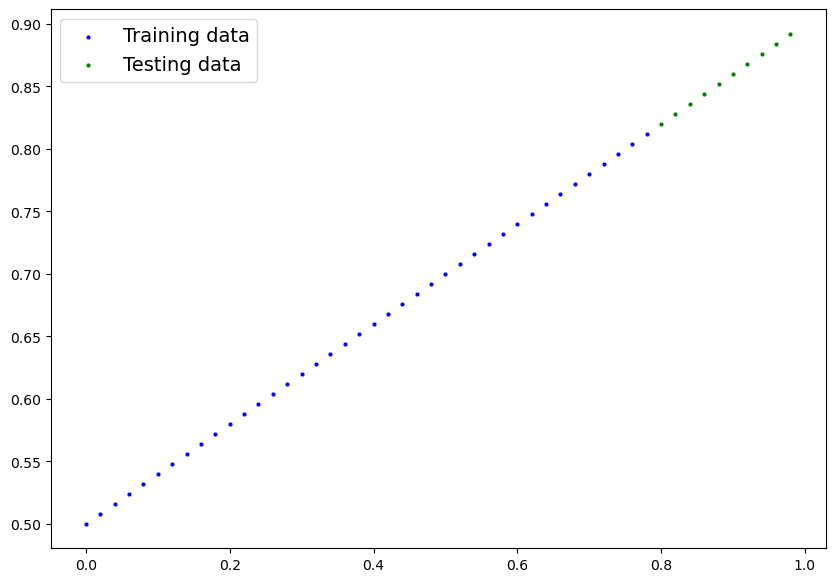

In [196]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear model

In [197]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [198]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.5000],
         [0.5080],
         [0.5160],
         [0.5240],
         [0.5320]]))

In [199]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [200]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [201]:
model_1.state_dict() 

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])


### 6.3 Training

For training we need:
- Loss function
- Optimizer
- Training loop
- Testing loop

In [202]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [203]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.4721779227256775 | Test loss: 0.6409762501716614
Epoch: 10 | Loss: 0.35696810483932495 | Test loss: 0.5062663555145264
Epoch: 20 | Loss: 0.24175818264484406 | Test loss: 0.3715565800666809
Epoch: 30 | Loss: 0.12654830515384674 | Test loss: 0.23684673011302948
Epoch: 40 | Loss: 0.04844613000750542 | Test loss: 0.13103243708610535
Epoch: 50 | Loss: 0.03668627887964249 | Test loss: 0.09166839718818665
Epoch: 60 | Loss: 0.03288380056619644 | Test loss: 0.07793644815683365
Epoch: 70 | Loss: 0.029409121721982956 | Test loss: 0.06829015165567398
Epoch: 80 | Loss: 0.025980591773986816 | Test loss: 0.06001759320497513
Epoch: 90 | Loss: 0.02254178188741207 | Test loss: 0.051745057106018066
Epoch: 100 | Loss: 0.019107189029455185 | Test loss: 0.044159404933452606
Epoch: 110 | Loss: 0.015676964074373245 | Test loss: 0.03588685393333435
Epoch: 120 | Loss: 0.012238160707056522 | Test loss: 0.027614319697022438
Epoch: 130 | Loss: 0.008805260062217712 | Test loss: 0.0200286619365215

In [204]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4056]])),
             ('linear_layer.bias', tensor([0.4955]))])

### 6.4 Making and evaluating predictions 

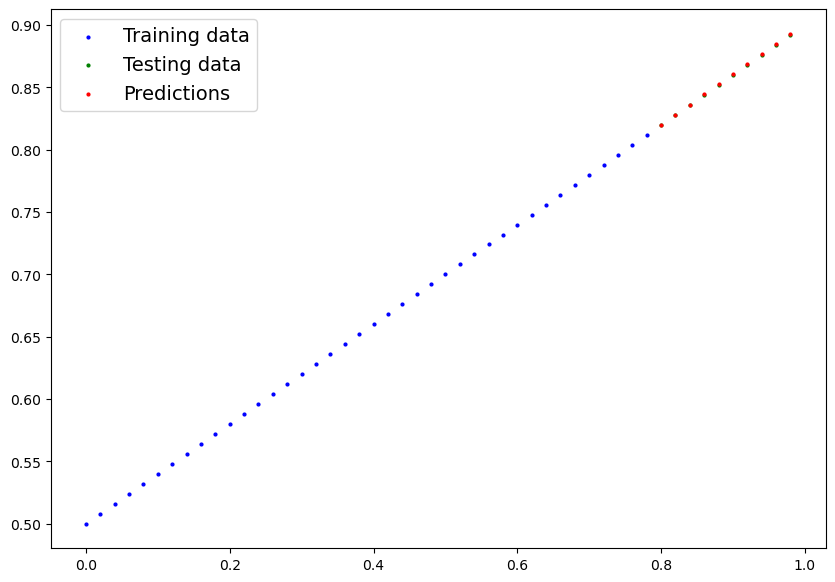

In [208]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)

plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

### 6.5 Saving and loading a trained model

In [209]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_1.pth


In [210]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4056]])),
             ('linear_layer.bias', tensor([0.4955]))])

In [211]:
# Load a PyTorch model

# Create a new instance of lienar regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [212]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [213]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4056]])),
             ('linear_layer.bias', tensor([0.4955]))])

In [214]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])